## **Limpieza, Transformación, Análisis y Visualización de Datos**

In [48]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Cargar las variables de entorno
load_dotenv()
path_doc = os.getenv("LOCAL_PATH_DOC")

### **Perú**

In [37]:
df_peru = pd.read_excel(f'{path_doc}Peru.xlsx')
df_peru

,Nombre en país de origen,F. Nacim./Edad,Lugar de nacimiento,Altura,Nacionalidad,Posición,Pie,Fichado,Contrato hasta,Opción de contrato,Última renovación,Proveedor,Image URL,Valor de mercado actual,Último revisión,Agente,Club,Prestado de,Contrato allí hasta
0,Pedro David Gallese Quiroz,23/02/1990 (34),Lima,"1,89 m",Perú,Portero,izquierdo,17/01/2020,31/12/2024,Un año más por parte del club,27/12/2022,adidas,https://img.a.transfermarkt.technology/portrai...,"1,20 mill. €",Última revisión: 13/06/2024,Adequatesports,Orlando City SC,NaN,NaN
1,Carlos Augusto Zambrano Ochandarte,10/07/1989 (34),Callao,"1,85 m",Perú,Defensa - Defensa central,derecho,08/01/2023,31/12/2024,NaN,NaN,Nike,https://img.a.transfermarkt.technology/portrai...,375 mil €,Última revisión: 28/05/2024,Miembro de su ...,Club Alianza Lima,NaN,NaN
2,Miguel Gianpierre Araujo Blanco,24/10/1994 (29),Lima,"1,81 m",Perú,Defensa - Defensa central,derecho,05/07/2023,31/12/2025,Un año más por parte del club,NaN,Nike,https://img.a.transfermarkt.technology/portrai...,850 mil €,Última revisión: 13/06/2024,AGREF,Portland Timbers,NaN,NaN
3,Alexander Martín Marquinho Callens Asín,04/05/1992 (32),Callao,"1,86 m",Perú\n España,Defensa - Defensa central,izquierdo,08/09/2023,30/06/2024,Opción de compra,NaN,Nike,https://img.a.transfermarkt.technology/portrai...,"1,20 mill. €",Última revisión: 30/05/2024,DV7 Management,AEK Atenas FC,Girona FC,30/06/2025
4,Andy Jorman Polo Andrade,29/09/1994 (29),Lima,"1,74 m",Perú,Delantero - Extremo derecho,derecho,21/03/2022,31/12/2025,NaN,09/12/2023,Nike,https://img.a.transfermarkt.technology/portrai...,"1,00 mill. €",Última revisión: 28/05/2024,Promoesport,Universitario de Deportes,NaN,NaN
5,Marcos Johan López Lanfranco,20/11/1999 (24),Lima,"1,76 m",Perú,Defensa - Lateral izquierdo,izquierdo,08/08/2022,30/06/2026,NaN,NaN,Nike,https://img.a.transfermarkt.technology/portrai...,"3,00 mill. €",Última revisión: 31/05/2024,Vibra Futbol,Feyenoord Rotterdam,NaN,NaN
6,Wilder José Cartagena Mendoza,23/09/1994 (29),Lima,"1,80 m",Perú,Medio campo - Pivote,derecho,31/01/2024,31/12/2025,NaN,NaN,Nike,https://img.a.transfermarkt.technology/portrai...,"2,50 mill. €",Última revisión: 13/06/2024,FFOSA Sports,Orlando City SC,NaN,NaN
7,Piero Aldair Quispe Córdova,14/08/2001 (22),Lima,"1,68 m",Perú,Medio campo - Mediocentro ofensivo,derecho,01/01/2024,31/12/2026,NaN,NaN,Nike,https://img.a.transfermarkt.technology/portrai...,"1,80 mill. €",Última revisión: 14/06/2024,Teamtalentsagency,Pumas UNAM,NaN,NaN
8,Sergio Fernando Peña Flores,28/09/1995 (28),Lima,"1,78 m",Perú\n España,Medio campo - Mediocentro,derecho,04/08/2021,31/12/2024,NaN,NaN,Nike,https://img.a.transfermarkt.technology/portrai...,"2,80 mill. €",Última revisión: 13/06/2024,AGREF,Malmoe FF,NaN,NaN
9,Edison Michael Flores Peralta,14/05/1994 (30),Lima,"1,70 m",Perú,Delantero - Extremo izquierdo,izquierdo,01/07/2023,31/12/2024,NaN,NaN,adidas,https://img.a.transfermarkt.technology/portrai...,"1,20 mill. €",Última revisión: 28/05/2024,AGREF,Universitario de Deportes,Atlas Guadalajara,-


In [38]:
df_peru[["Valor Actual", "Unidad monetaria Actual", "Moneda Actual"]] = df_peru["Valor de mercado actual"].str.extract(r'([0-9,]+)\s*(mil|mill\.)\s*(€)')
df_peru["Valor Actual"] = df_peru["Valor Actual"].apply(lambda x : x.strip()).apply(lambda x : float(x.replace(",",".")))
df_peru["Unidad monetaria Actual"] = df_peru["Unidad monetaria Actual"].apply(lambda x : x.strip())
df_peru["Unidad monetaria Actual (en miles)"] = df_peru["Unidad monetaria Actual"].apply(lambda x : 1000000 if x == "mill." else 1000)
df_peru["Valor Actual Num"] = df_peru["Valor Actual"] * df_peru["Unidad monetaria Actual (en miles)"]
df_peru["Moneda Actual"] = df_peru["Moneda Actual"].apply(lambda x : x.strip())

In [79]:
df_peru = df_peru.sort_values(by="Valor Actual Num", ascending=False).reset_index(drop = True)

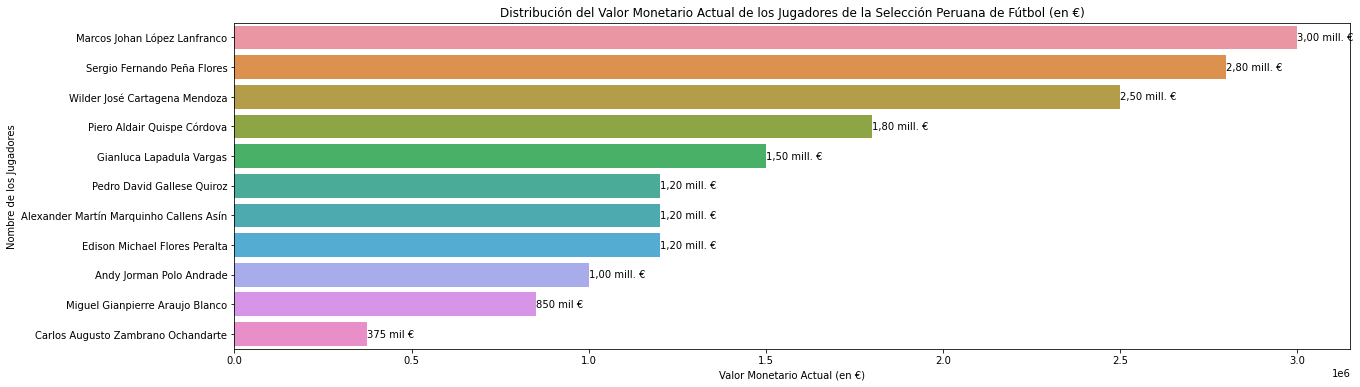

In [76]:
fig, ax = plt.subplots(figsize = (20,6))
ax = sns.barplot(data=df_peru.sort_values(by = "Valor Actual Num", ascending=False), x="Valor Actual Num", y="Nombre en país de origen")
for container in ax.containers:
    ax.bar_label(container, labels=df_peru["Valor de mercado actual"], fontsize=10)
plt.xlabel("Valor Monetario Actual (en €)")
plt.ylabel("Nombre de los Jugadores")
plt.title("Distribución del Valor Monetario Actual de los Jugadores de la Selección Peruana de Fútbol (en €)")
plt.show()

### **Argentina**

In [78]:
df_argentina = pd.read_excel(f'{path_doc}Argentina.xlsx')
df_argentina

,Nombre en país de origen,F. Nacim./Edad,Lugar de nacimiento,Altura,Nacionalidad,Posición,Pie,Fichado,Contrato hasta,Opción de contrato,Última renovación,Proveedor,Image URL,Valor de mercado actual,Último revisión,Agente,Club
0,Damián Emiliano Martínez Romero,02/09/1992 (31),Mar del Plata,"1,95 m",Argentina\n España,Portero,derecho,16/09/2020,30/06/2027,NaN,21/01/2022,adidas,https://img.a.transfermarkt.technology/portrai...,"28,00 mill. €",Última revisión: 27/05/2024,Universal Twenty Two,Aston Villa
1,Nahuel Molina Lucero,06/04/1998 (26),Embalse,"1,75 m",Argentina,Defensa - Lateral derecho,derecho,28/07/2022,30/06/2027,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,"28,00 mill. €",Última revisión: 07/06/2024,NaN,Atlético de Madrid
2,Cristian Gabriel Romero,27/04/1998 (26),Córdoba,"1,85 m",Argentina,Defensa - Defensa central,derecho,30/08/2022,30/06/2027,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,"60,00 mill. €",Última revisión: 27/05/2024,Ciro Palermo,Tottenham Hotspur
3,Lisandro Martínez,18/01/1998 (26),Gualeguay,"1,75 m",Argentina,Defensa - Defensa central,izquierdo,27/07/2022,30/06/2027,Un año más,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,"45,00 mill. €",Última revisión: 27/05/2024,Score Futbol,Manchester United
4,Nicolás Alejandro Tagliafico,31/08/1992 (31),Rafael Calzada,"1,72 m",Argentina\n Italia,Defensa - Lateral izquierdo,izquierdo,23/07/2022,30/06/2025,NaN,NaN,Nike,https://img.a.transfermarkt.technology/portrai...,"8,00 mill. €",Última revisión: 03/06/2024,CAA Stellar,Olympique de Lyon
5,Enzo Jeremías Fernández,17/01/2001 (23),San Martín,"1,78 m",Argentina,Medio campo - Mediocentro,derecho,31/01/2023,30/06/2032,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,"75,00 mill. €",Última revisión: 27/05/2024,DE 9 FÚTBOL,Chelsea FC
6,Alexis Mac Allister,24/12/1998 (25),Santa Rosa,"1,76 m",Argentina\n Italia,Medio campo - Mediocentro,derecho,01/07/2023,30/06/2028,NaN,NaN,adidas,https://img.a.transfermarkt.technology/portrai...,"75,00 mill. €",Última revisión: 27/05/2024,NaN,Liverpool FC
7,Rodrigo Javier de Paul,24/05/1994 (30),Sarandí,"1,80 m",Argentina\n Italia,Medio campo - Mediocentro,derecho,12/07/2021,30/06/2026,NaN,NaN,adidas,https://img.a.transfermarkt.technology/portrai...,"30,00 mill. €",Última revisión: 07/06/2024,Augustin Jimenez,Atlético de Madrid
8,Nicolás Iván González,06/04/1998 (26),Belén de Escobar,"1,80 m",Argentina\n Italia,Delantero - Extremo derecho,izquierdo,01/07/2021,30/06/2028,NaN,26/09/2023,NaN,https://img.a.transfermarkt.technology/portrai...,"35,00 mill. €",Última revisión: 05/06/2024,Gea World,Fiorentina
9,Lionel Andrés Messi Cuccitini,24/06/1987 (37),Rosario,"1,70 m",Argentina\n España,Delantero - Extremo derecho,izquierdo,15/07/2023,31/12/2025,NaN,NaN,adidas,https://img.a.transfermarkt.technology/portrai...,"30,00 mill. €",Última revisión: 13/06/2024,Miembro de su ...,Inter Miami CF


In [80]:
df_argentina[["Valor Actual", "Unidad monetaria Actual", "Moneda Actual"]] = df_argentina["Valor de mercado actual"].str.extract(r'([0-9,]+)\s*(mil|mill\.)\s*(€)')
df_argentina["Valor Actual"] = df_argentina["Valor Actual"].apply(lambda x : x.strip()).apply(lambda x : float(x.replace(",",".")))
df_argentina["Unidad monetaria Actual"] = df_argentina["Unidad monetaria Actual"].apply(lambda x : x.strip())
df_argentina["Unidad monetaria Actual (en miles)"] = df_argentina["Unidad monetaria Actual"].apply(lambda x : 1000000 if x == "mill." else 1000)
df_argentina["Valor Actual Num"] = df_argentina["Valor Actual"] * df_argentina["Unidad monetaria Actual (en miles)"]
df_argentina["Moneda Actual"] = df_argentina["Moneda Actual"].apply(lambda x : x.strip())
df_argentina = df_argentina.sort_values(by="Valor Actual Num", ascending=False).reset_index(drop = True)

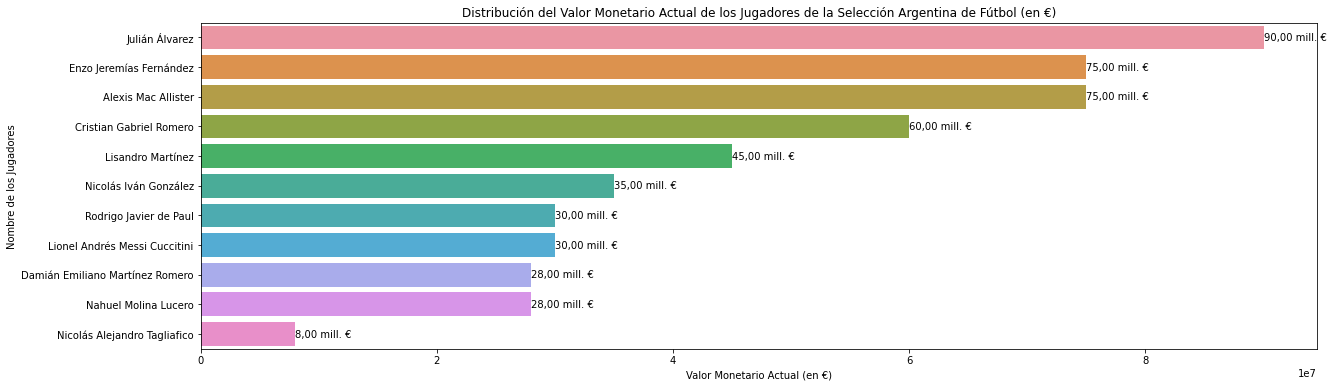

In [82]:
fig, ax = plt.subplots(figsize = (20,6))
ax = sns.barplot(data=df_argentina, x="Valor Actual Num", y="Nombre en país de origen")
for container in ax.containers:
    ax.bar_label(container, labels=df_argentina["Valor de mercado actual"], fontsize=10)
plt.xlabel("Valor Monetario Actual (en €)")
plt.ylabel("Nombre de los Jugadores")
plt.title("Distribución del Valor Monetario Actual de los Jugadores de la Selección Argentina de Fútbol (en €)")
plt.show()